In [1]:
import os
import sys
%reload_ext autoreload
%autoreload
%matplotlib inline

project_root = os.path.abspath(os.path.join('../../../'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import pandas as pd
from ml_workbench.src.data_loaders.BablTask1Loader import split_parse_data

X_train, y_train = split_parse_data('/Users/enrico.t/code/ml_workbench/' + 
  'data/tasks_1-20_v1-2/en/qa1_single-supporting-fact_train.txt')

Set(['Sandrahallway', 'Danielbathroom', 'Johngarden', 'Sandraoffice', 'Danielhallway', 'WhereJohn', 'Marykitchen', 'Danieloffice', 'Johnbathroom', 'Johnbedroom', 'Sandrakitchen', 'WhereSandra', 'Maryhallway', 'Maryoffice', 'Marygarden', 'Danielbedroom', 'Sandragarden', 'Johnkitchen', 'Sandrabedroom', 'Marybathroom', 'Johnoffice', 'Danielgarden', 'WhereDaniel', 'Sandrabathroom', 'Danielkitchen', 'Johnhallway', 'WhereMary', 'Marybedroom'])


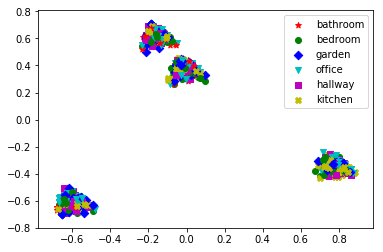

In [3]:
import pylab as pl
from sklearn.decomposition import PCA
from ml_workbench.src.vectorizers.ColumnBowVectorizer import ColumnBowVectorizer

vectorizer = ColumnBowVectorizer()
vectorized_X_train = vectorizer.fit_transform(X_train)

print vectorizer._vocabulary

pca_2d = PCA(n_components=2).fit_transform(vectorized_X_train)
y_train_list = y_train.values.flatten()

for i in range(0, pca_2d.shape[0]):
    if y_train_list[i] == 'bathroom':
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='*')
    elif y_train_list[i] == 'bedroom':
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif y_train_list[i] == 'garden':
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='D')
    elif y_train_list[i] == 'office':
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='c', marker='v')
    elif y_train_list[i] == 'hallway':
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='s')
    elif y_train_list[i] == 'kitchen':
        c6 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='X')
        
pl.legend([c1, c2, c3, c4, c5, c6], ['bathroom', 'bedroom', 'garden', 'office', 'hallway', 'kitchen'])

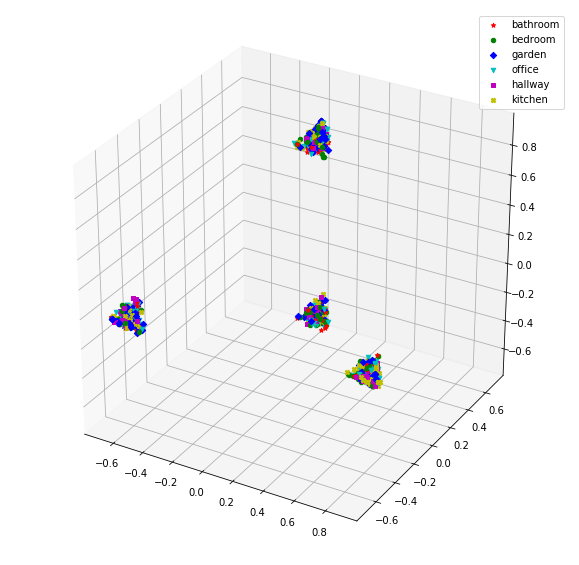

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

y_train_list = y_train.values.flatten()

result=pd.DataFrame(PCA(n_components=3).fit_transform(
    vectorized_X_train), columns=['%i' % i for i in range(3)])

# Plot initialisation
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(0, len(result.values)):
    if y_train_list[i] == 'bathroom':
        c1 = ax.scatter(result['0'].iloc[i], result['1'].iloc[i], result['2'].iloc[i], c='r', marker='*')
    if y_train_list[i] == 'bedroom':
        c2 = ax.scatter(result['0'].iloc[i], result['1'].iloc[i], result['2'].iloc[i], c='g', marker='o')
    if y_train_list[i] == 'garden':
        c3 = ax.scatter(result['0'].iloc[i], result['1'].iloc[i], result['2'].iloc[i], c='b', marker='D')
    if y_train_list[i] == 'office':
        c4 = ax.scatter(result['0'].iloc[i], result['1'].iloc[i], result['2'].iloc[i], c='c', marker='v')
    if y_train_list[i] == 'hallway':
        c5 = ax.scatter(result['0'].iloc[i], result['1'].iloc[i], result['2'].iloc[i], c='m', marker='s')
    if y_train_list[i] == 'kitchen':
        c6 = ax.scatter(result['0'].iloc[i], result['1'].iloc[i], result['2'].iloc[i], c='y', marker='X')

ax.legend([c1, c2, c3, c4, c5, c6], ['bathroom', 'bedroom', 'garden', 'office', 'hallway', 'kitchen'])

In [5]:
# there seems to be a cluster for each person, so using this vectorizer, the classifier is 
# basically learning which places each person can go, and then depending on which ngrams 
# are present picks the right place, e.g:

# - where-john
# - john-hallway
# - mary-kitchen
# - answer: hallway

# so it learns that when mary is in the kitchen, john is in the hallway. 
# it will be less sure that john is in the hallway if there's another 
# fact that it hasn't trained with before. (i think? depends how features are weighted)

# i suspect with more data the classifier would perform better, as 
# it could further tease apart the different combinations.

# ideally we would find a way to learn the invariant pattern <Person><at><Place>, so 
# that even unseen people and places could be correctly classified.